In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
path='/Users/apple/Desktop/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [17]:
import json
path='/Users/apple/Desktop/example.txt'
records=[json.loads(line) for line in open(path)]

In [20]:
records[:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

In [21]:
frame=pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [22]:
tz_counts=frame['tz'].value_counts()

In [23]:
tz_counts

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
America/Costa_Rica              1
America/Argentina/Cordoba       1
Asia/Manila                     1
America/Monterrey               1
America/Montevideo              1
Name: tz, Length: 97, dtype: int64

In [24]:
frame['tz'].isnull().sum()

120

In [25]:
clean_tz=frame['tz'].fillna('Missing')

In [31]:
clean_tz[clean_tz=='']='Unknown'

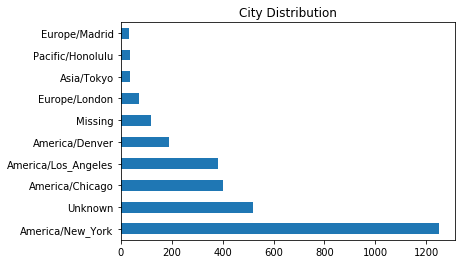

In [35]:
clean_tz.value_counts()[:10].plot(kind='barh',title='City Distribution')

In [36]:
results=pd.Series([x.split()[0] for x in frame['a'].dropna()])

In [37]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
BlackBerry8520/5.0.0.592                                3
Dalvik/1.4.0                                            3
Goldfire                                                2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
Mozilla/0.6                                             1
Opera/9.30                                              1
BlackBerry9530/5.0.0.328                                1
Nokia6790s-1b/

In [38]:
cframe=frame[frame['a'].notnull()]

we want to compute a value for wehter each row is windows or not

In [39]:
cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [42]:
by_tz_os=cframe.groupby(['tz','os'])

In [46]:
agg_counts=by_tz_os.size().unstack().fillna(0)

In [47]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [53]:
indexer=agg_counts.sum(axis=1).argsort()

In [54]:
agg_counts.sum(axis=0)

os
Not Windows    1194.0
Windows        2246.0
dtype: float64

In [55]:
count_sub=agg_counts.take(indexer[-10:])

In [56]:
count_sub

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [60]:
count_sub=count_sub.stack()

In [66]:
count_sub.name='total'

count_sub=count_sub.reset_index()

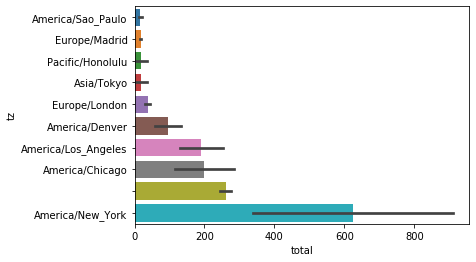

In [67]:
import seaborn as sns
sns.barplot(x='total',y='tz',data=count_sub)

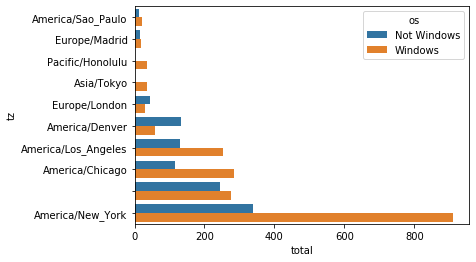

In [69]:
sns.barplot(x='total',y='tz',hue='os',data=count_sub)